In [1]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [2]:
!conda env list

# conda environments:
#
GoogEarthEngine          /home/jp/miniconda2/envs/GoogEarthEngine
astroconda               /home/jp/miniconda2/envs/astroconda
everest-pipeline         /home/jp/miniconda2/envs/everest-pipeline
helios                   /home/jp/miniconda2/envs/helios
iraf27                   /home/jp/miniconda2/envs/iraf27
ircs_pol                 /home/jp/miniconda2/envs/ircs_pol
moscatel                 /home/jp/miniconda2/envs/moscatel
radmc3dpy                /home/jp/miniconda2/envs/radmc3dpy
root                  *  /home/jp/miniconda2



Quick estimate of centroiding accuracy as a function of signal to noise

In [3]:
from astropy.convolution import Gaussian1DKernel,convolve

In [9]:
import numpy as np

# define our x axis: will be 10 "angstroms" wide with a 2-angstrom fwhm resolution
# Each resel will be sampled by 3 pixels
npix = 15 #3*10/2.0


x_angstroms = np.linspace(-5,5,npix)
pixel_scale = (x_angstroms.max()-x_angstroms.min())/npix #nm per pix

In [10]:
# Unresolved line.  Amplitude = 1
xcen = 0.4
# oversample, then downsample
x_hires = np.linspace(x_angstroms.min(),x_angstroms.max(),npix*10)
pixel_scale_hires = (x_hires.max()-x_hires.min())/(npix*10)
gg = np.exp(-(x_hires-xcen)**2/(2*0.1**2))
instrument_smooth_function = Gaussian1DKernel(2/pixel_scale_hires/2.35)
ggsm = convolve(gg, instrument_smooth_function)[::int(pixel_scale/pixel_scale_hires)]

In [11]:
pixel_scale,pixel_scale_hires
ggsm.shape, npix, x_angstroms.size

((15,), 15, 15)

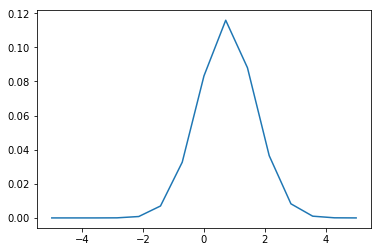

In [14]:
import pylab as pl
%matplotlib inline
pl.plot(x_angstroms,ggsm)

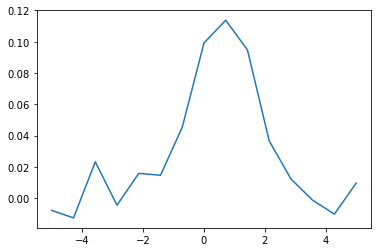

In [15]:
pl.plot(x_angstroms,ggsm+np.random.randn(ggsm.size)/76.)

In [16]:
from scipy.optimize import curve_fit

In [17]:
# fit a gaussian back to the input
def g(x,xc,sig): return np.exp(-(x-xc)**2/(2*sig**2))

In [18]:
curve_fit(g, x_angstroms, ggsm+np.random.randn(x_angstroms.size))

(array([-0.78174807,  0.46569365]), array([[ 0.46131243,  0.04800528],
        [ 0.04800528,  0.21036561]]))

In [19]:
y = [curve_fit(g,x_angstroms,ggsm+np.random.rand(npix)/76)[0][0] for i in range(1000)]

In [20]:
np.std(y)

0.0019276854579521779

(array([  20.,   63.,   95.,  177.,  178.,  161.,  139.,   95.,   51.,   21.]),
 array([ 1.05632798,  1.05727322,  1.05821847,  1.05916371,  1.06010896,
         1.06105421,  1.06199945,  1.0629447 ,  1.06388994,  1.06483519,
         1.06578043]),
 <a list of 10 Patch objects>)

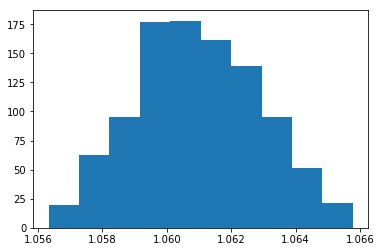

In [21]:
pl.hist(y)

In [22]:
z = [curve_fit(g,x_angstroms,ggsm+np.random.rand(x_angstroms.size)/214)[0][0] for i in range(1000)]

(array([  20.,   68.,  111.,  141.,  167.,  166.,  143.,   90.,   65.,   29.]),
 array([ 1.05913001,  1.05947427,  1.05981853,  1.06016279,  1.06050705,
         1.06085131,  1.06119557,  1.06153983,  1.06188409,  1.06222835,
         1.06257261]),
 <a list of 10 Patch objects>)

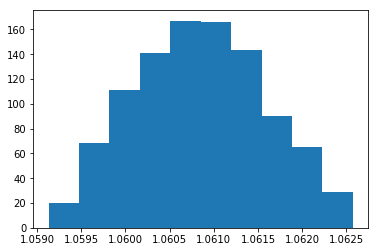

In [23]:
pl.hist(z)

In [24]:
np.std(z)

0.00074154699845705308